In [1]:
# Name : Romi Roy
# Reg. No: 21MIS1124

Consider the dataset given below to predict the target variable(auto price) using other independent variables.
Identify and apply suitable ML model for the prediction with appropriate justification for each stages(selecting models, accuracy and interpretation etc).

In [2]:
# Import Libraries
import pandas as pd
import numpy as np

In [3]:
# Load the Data
filepath = '/home/ex5/Downloads/1124/March 05/auto_prize data.csv'

df = pd.read_csv(filepath)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,target
0,5,164,99.800003,176.600006,66.199997,54.299999,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,5,164,99.400002,176.600006,66.400002,54.299999,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,4,158,105.800003,192.699997,71.400002,55.700001,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,4,158,105.800003,192.699997,71.400002,55.900002,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,5,192,101.199997,176.800003,64.800003,54.299999,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [4]:
# Splitting the dataset into X and Y
X = df.drop(columns=['target'])
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

In [7]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Printing the intercepts
intercepts = model.intercept_
print(intercepts)

-60352.432929219154


In [9]:
# Printing the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
symboling           -42.532102
normalized-losses    18.153089
wheel-base          254.358354
length             -147.476106
width               912.971593
height              -15.492795
curb-weight           4.358262
engine-size          73.720232
bore              -1247.961125
stroke            -1862.545155
compression-ratio   108.314618
horsepower           -0.107244
peak-rpm              0.361574
city-mpg            -38.629412
highway-mpg          -6.135060


In [10]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [11]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [20369.00933356 18199.42157204 12460.14132219  9958.45400248
 11569.39732835  5629.14321016 10469.70557689  8363.90936843
  7818.98846139  8975.34697472  4986.25973972  7109.36214985
  7412.95043846  6234.67717423  6900.45872721  8644.43700327
 12412.20043567  9022.98057149 12099.34854666  7412.95043846
 14991.2243636  14291.12697665  6372.77554597  6042.60418717
  9804.58899129  8978.87178449 12721.88630378 10132.7844989
  9098.13223569 14959.12982119 10756.3197296  22402.88703209]


In [12]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
78,13200,20369.009334
155,19045,18199.421572
128,9989,12460.141322
55,6989,9958.454002
94,15510,11569.397328
29,10295,5629.143210
147,9980,10469.705577
51,6669,8363.909368
98,7053,7818.988461
141,7975,8975.346975


In [13]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Model evaluation
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print("R-squared:", r2)

Mean Absolute Error: 2062.6943887461093
Mean Square Error: 8090015.806315936
Root Mean Square Error: 2844.2953092665916
R-squared: 0.5453675752176336


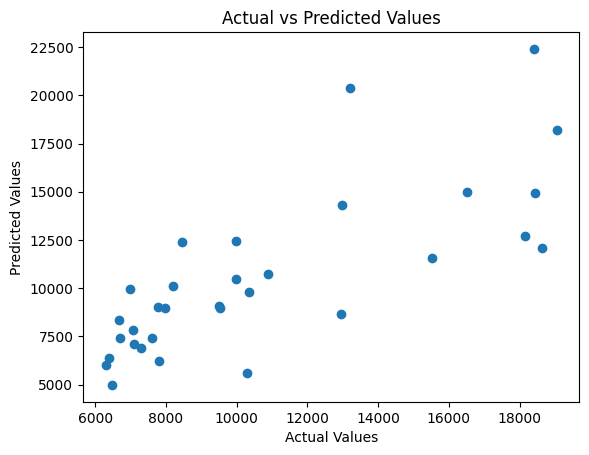

In [14]:
# Plotting actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [15]:
# Interpretation:
# 1. Model Selection:
#    The notebook uses a Linear Regression & Multiple Linear regression model for prediction. 
#    This choice is appropriate for predicting a continuous target variable (auto price) based
#    on multiple independent variables.
# 2. Model Accuracy:
#    The R-squared value of approximately 0.55, suggests that the model explains about
#    55% of the variance in the target variable, which indicates a moderate level of predictive power.
#    The Mean Absolute Error (MAE) of approximately 2062.69 indicates the average absolute difference
#    between the actual and predicted auto prices, providing a measure of model accuracy. 